# INTRODUCTION

This notebook looks into developing an end-to-end machine learning pipeline in Python to predict the probability of default (Credit risk modelling concept) using a financial dataset.

We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling
- Experimentation

### Problem Definition

- Given Financial details about a person, can we predict whether or not they are likely to default on a loan?

### Evaluation

- If we can reach a considerable good roc-auc score in classification.


# Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve




### Load Data


In [3]:
 
data = pd.read_csv('data_science_competition_2024.csv')
df = pd.read_csv('data_science_competition_2024.csv')
df.columns
print(df.shape )# (rows, columns)
df.head(4)


(100000, 21)


,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,...,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,...,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,...,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,...,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default


#### Create y from Loan Status column and X from remaining dataframe


# EXPLORATORY DATA ANALYSIS

#### The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [4]:
print(df.shape)
df.tail()

(100000, 21)


,Unnamed: 0,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,...,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
99995,99995,41000f4b-3821-4dea-90e1-9ecf591ed1c0,male,2021 10 20,USD,Zimbabwe,male,False,NaN,Marondera,...,1,32968.219881,0.21,52,1,29,1803.818844,single,52,Did not default
99996,99996,507c2a45-02fa-4aa0-854a-8947a865a7ea,other,2023 06 11,USD,Zimbabwe,other,True,Engineer,Chimanimani,...,0,48652.554897,0.23,50,0,57,3056.127917,married,50,Did not default
99997,99997,4f10e845-8f75-4cd5-9f3a-3dad3e04a483,female,2021 10 20,USD,Zimbabwe,female,True,Data Analyst,Kadoma,...,0,34266.224130,0.23,43,0,53,3535.599759,married,43,Did not default
99998,99998,eded01ca-79d2-4e86-a1e3-2ea1354edca7,male,2021 08 22,USD,Zimbabwe,male,True,Engineer,Mutare,...,2,71546.024917,0.22,49,2,59,3082.407123,single,49,Did not default
99999,99999,a37561ec-0901-4350-8a13-634f80ece55d,other,2022 04 29,USD,Zimbabwe,other,True,Engineer,Gweru,...,0,43141.102930,0.21,47,0,47,2670.766532,married,47,Did not default


#### class balance


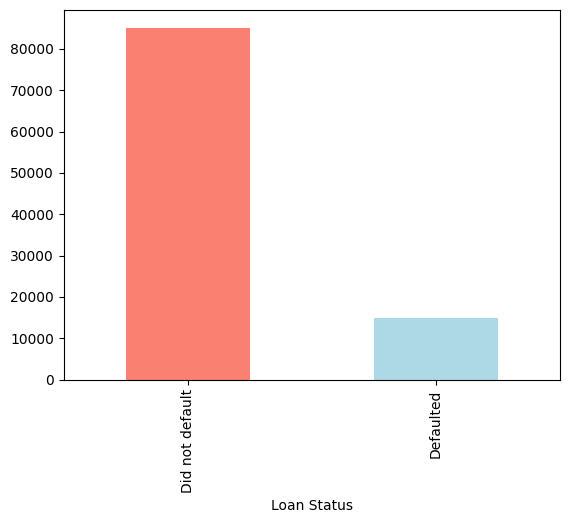

In [5]:

df['Loan Status'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.describe()

,Unnamed: 0,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,49999.500000,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,28867.657797,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,0.000000,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,24999.750000,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,49999.500000,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,74999.250000,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,99999.000000,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000


In [7]:
df.isna().sum()

Unnamed: 0                 0
loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

## Structure overview 
* The dataset is has 100000 rows and 21 columns. 
* It has both categorical and numerical features.
* It is extremely imbalanced 
* It has missing values in the job, location and country columns

### Univariate relationships
* identify the distribution of the individual features

<Figure size 1000x600 with 0 Axes>

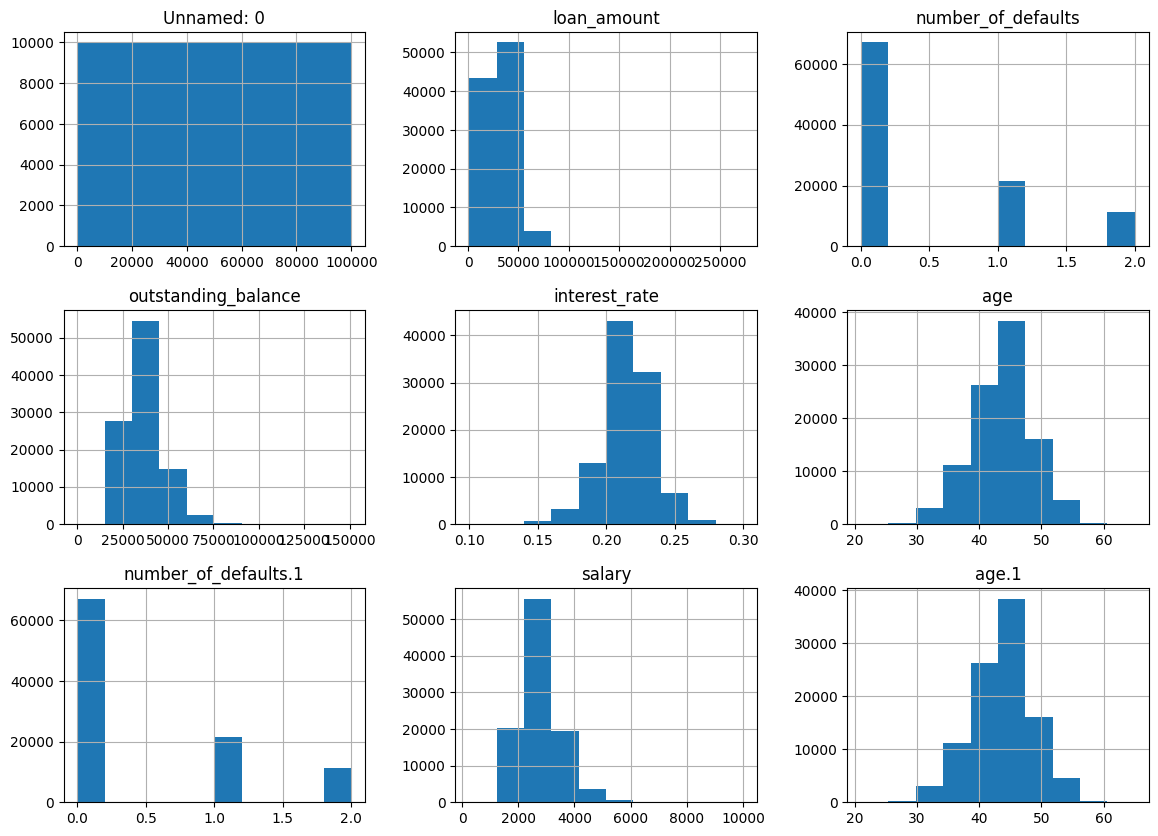

In [8]:
#univariate hist plots
plt.figure(figsize=(10,6))

df.hist(figsize=(14,10));

### TEST IF THE THESE NUMERICAL FEATURES ARE NORMALLY DISTRIBUTED USING QQPLOT

Text(0, 0.5, 'loan amount Quantiles')

<Figure size 2000x1600 with 0 Axes>

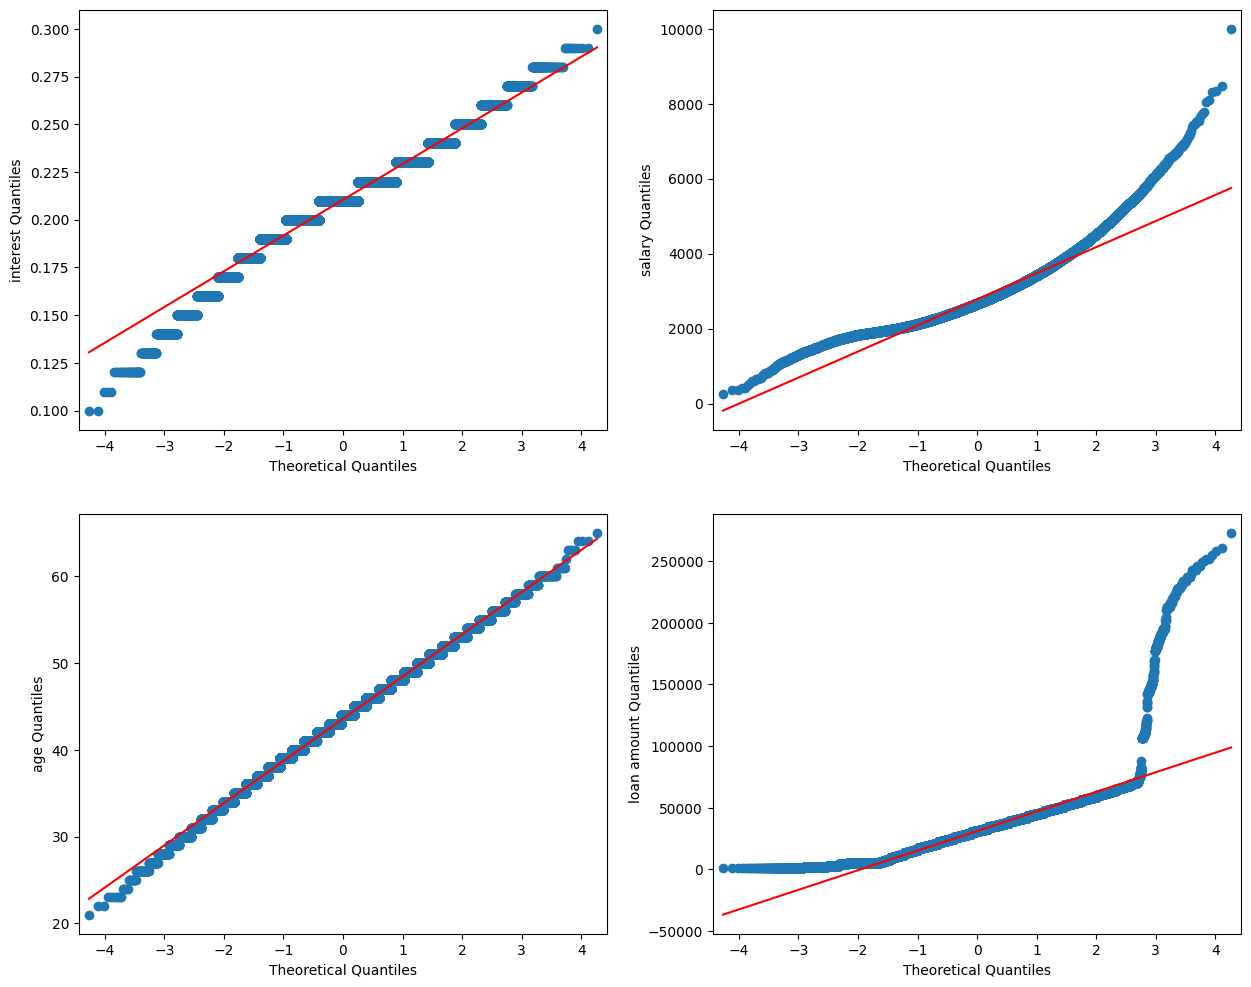

In [9]:
import statsmodels.graphics.gofplots as sm

plt.figure(figsize = (20,16))

fig, ((ax, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (15,12))
       
sm.qqplot(df['interest_rate'], line='s', ax=ax)  # 's' for straight reference line
plt.xlabel('Theoretical Quantiles')
ax.set_ylabel('interest Quantiles')

sm.qqplot(df['salary'], line='s', ax=ax1)  # 's' for straight reference line
plt.xlabel('Theoretical Quantiles')
ax1.set_ylabel('salary Quantiles')

sm.qqplot(df['age'], line='s', ax=ax2)  # 's' for straight reference line
plt.xlabel('Theoretical Quantiles')
ax2.set_ylabel('age Quantiles')

sm.qqplot(df['loan_amount'], line='s', ax=ax3)  # 's' for straight reference line
plt.xlabel('Theoretical Quantiles')
ax3.set_ylabel('loan amount Quantiles')
       

### Here for a normal distribution, the the blue plot must trail along the red line
#### The theoretical quantiles must have a direct relationship with the feature quantiles

1. upper left: interest rate
1. upper right: salary
1. lower left: age
1. lower right: loan amount

### LOAN AMOUNT AND SALARY ARE  HIGHLY DEVIATING AWAY FROM NORMAL DISTRIBUTION

## CATEGORICAL FEATURE UNIVARIATE DISTRIBUTION

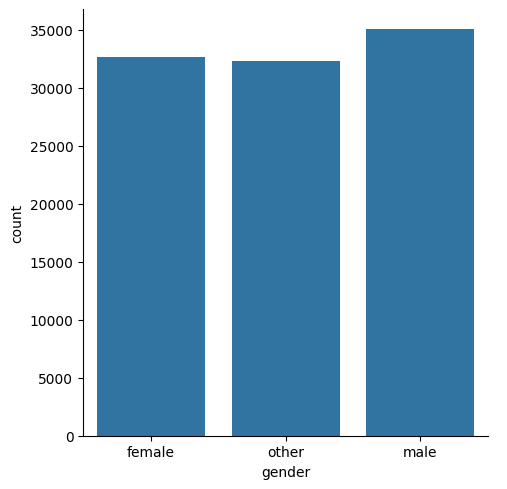

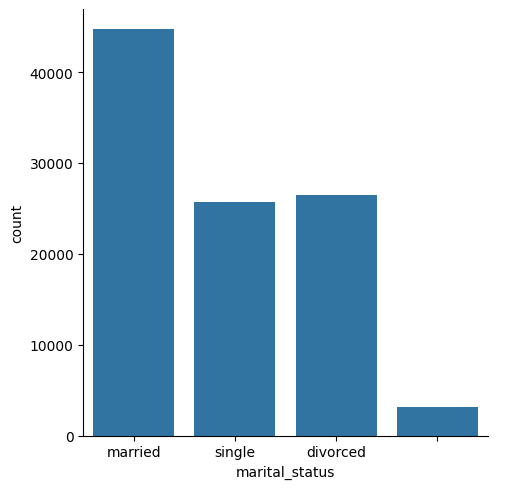

In [10]:
# fig, ((ax, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (15,12))

sns.catplot(data = df, x = 'gender', kind= 'count')
# sns.catplot(data = df, x = 'job', kind= 'count' )
# sns.catplot(data = df, x = 'outstanding_balance', kind= 'count' )
sns.catplot(data = df, x = 'marital_status', kind= 'count' )

## bivariate relationships


<Figure size 2000x1600 with 0 Axes>

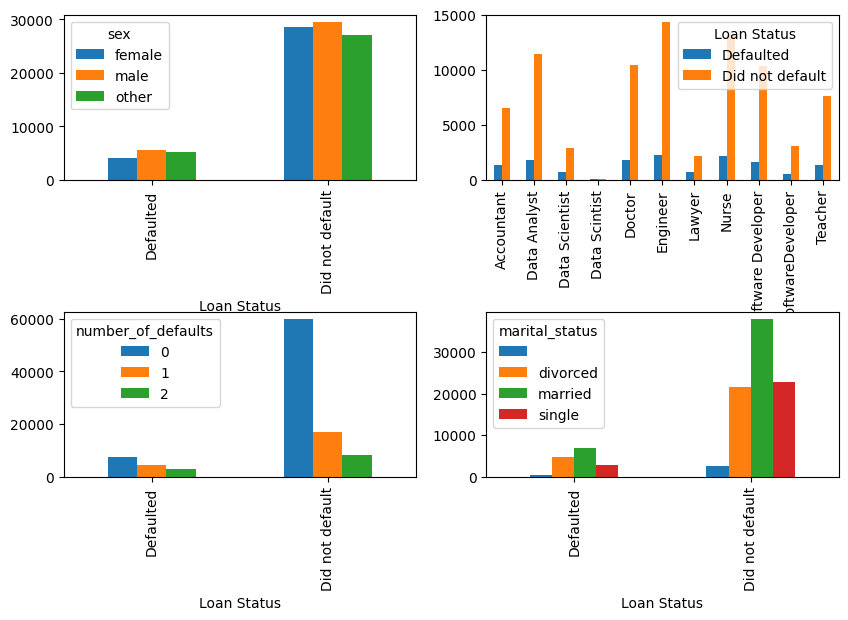

In [11]:
# Create a plot of crosstab

plt.figure(figsize = (20,16))

fig, ((ax, ax1), (ax2,ax3)) = plt.subplots(nrows=2, ncols=2, figsize = (15,12))
ax.ylabel = ("Default Frequency by Sex")
pd.crosstab(df['Loan Status'], df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                     ax= ax)
pd.crosstab(df['Loan Status'], df.job).T.plot(kind="bar",
                                    figsize=(10, 6),
                                    ax= ax1)
pd.crosstab(df['Loan Status'], df['number_of_defaults']).plot(kind="bar",
                                    figsize=(10, 6),
                                    ax= ax2)
pd.crosstab(df['Loan Status'], df['marital_status']).plot(kind="bar",
                                    figsize=(10, 6),
                                     ax= ax3)


plt.subplots_adjust(hspace=0.8)
plt.show()



###    OBSERVATIONS
* People who are married are less likely to deafulted
* People with less previous defaults are less likely to deasex is roughly balanced


<Axes: xlabel='loan_amount', ylabel='outstanding_balance'>

C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

C:\Users\Augah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


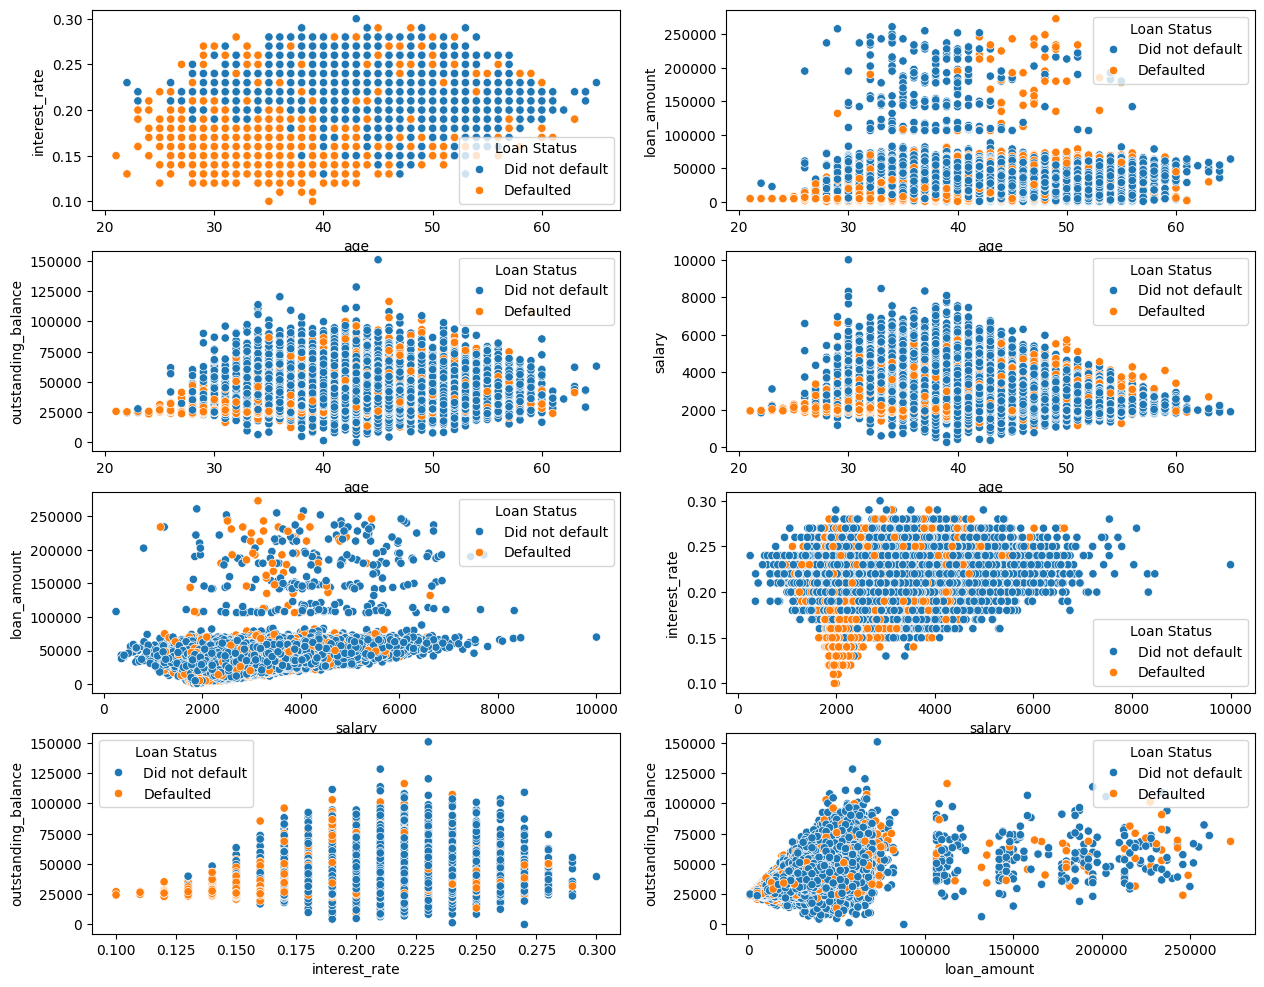

In [12]:

# Create another figure
plt.figure(figsize=(10, 6))
fig, ((ax, ax1), (ax2,ax3), (ax4, ax5),(ax6, ax7)) = plt.subplots(nrows=4, ncols=2, figsize = (15,12))

sns.scatterplot(data=df, x='age', y= 'interest_rate', hue= 'Loan Status', ax= ax);
sns.scatterplot(data=df, x='age', y= 'loan_amount', hue= 'Loan Status', ax= ax1);
sns.scatterplot(data=df, x='age', y= 'outstanding_balance', hue= 'Loan Status', ax= ax2);
sns.scatterplot(data=df, x='age', y= 'salary', hue= 'Loan Status', ax= ax3);
sns.scatterplot(data=df, x='salary', y= 'loan_amount', hue= 'Loan Status', ax= ax4);
sns.scatterplot(data=df, x='salary', y= 'interest_rate', hue= 'Loan Status', ax= ax5);
sns.scatterplot(data=df, x='interest_rate', y= 'outstanding_balance', hue= 'Loan Status', ax= ax6);
sns.scatterplot(data=df, x='loan_amount', y= 'outstanding_balance', hue= 'Loan Status', ax= ax7);
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2,whiten= True).fit_transform(df[['age', 'interest_rate']])
# plt.scatter(pca.T[0], pca.T[1], c=np.where(df['Loan Status']== 'Did not default', 'red','blue'))

### THE AGE VS INTEREST SEEMS TO TRY TO SEPERATE THE CLASSES. THIS MIGHT BE USEFUL. 

#### multivariate relationships


<Axes: >

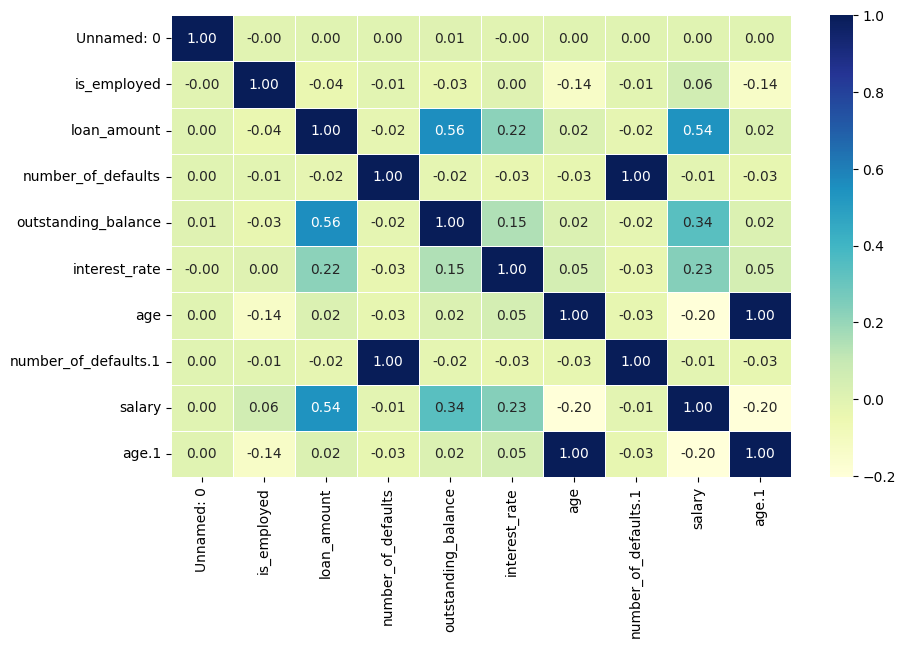

In [13]:
corrData = df.loc[:, [col for col in df if df[col].dtype not in ['category', 'object']]]
plt.figure(figsize=(10,6))
sns.heatmap(corrData.corr(), annot= True, linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

### THE SEEMS TO BE SOME TIGHT CORRELATION BETWEEN SOME FEATURES
`salary` and `loan amount`,  
`salary` and `loan remaining term`, 
`loan amount` and `outstanding_balance`

### CHECKING FOR ASSOCIATION BETWEEN  CATEGORICAL VARIABLES


In [31]:
from scipy.stats import chi2_contingency


for i in ['gender', 'remaining term', 'number_of_defaults', 'Loan Status', 'marital_status', 'gender', 'location', 'job']:
    for j in ['gender', 'remaining term', 'number_of_defaults', 'Loan Status', 'marital_status', 'gender', 'location', 'job']:
        observed_data = pd.crosstab(df[i], df[j]).to_numpy()


        chi2_statistic, pval, expected_frequency, obs = chi2_contingency(observed_data)

        # Print results
        print(f'for {i} and {j} ')
        print("Chi-Square Statistic:", chi2_statistic)
        print("p-value:", pval)
        print("======================================")

for gender and gender 
Chi-Square Statistic: 147070.0
p-value: 0.0
for gender and remaining term 
Chi-Square Statistic: 229.57748793104435
p-value: 0.25080515808834725
for gender and number_of_defaults 
Chi-Square Statistic: 21.19629259112421
p-value: 0.00028951570540293383
for gender and Loan Status 
Chi-Square Statistic: 149.17835377008234
p-value: 4.0395414528535954e-33
for gender and marital_status 
Chi-Square Statistic: 277.53079871069855
p-value: 7.591934467075502e-59
for gender and gender 
Chi-Square Statistic: 147070.0
p-value: 0.0
for gender and location 
Chi-Square Statistic: 2344.7423582168904
p-value: 0.0
for gender and job 
Chi-Square Statistic: 1495.5554372947167
p-value: 3.5785273618432644e-305
for remaining term and gender 
Chi-Square Statistic: 229.57748793104435
p-value: 0.25080515808834725
for remaining term and remaining term 
Chi-Square Statistic: 7941780.0
p-value: 0.0
for remaining term and number_of_defaults 
Chi-Square Statistic: 252.66763443405213
p-value: 0.0

### Here we used the chi_squared p_value from the contingency table, here:-
1. A p value less than 0.05 indicates association
2. A greater chi value indicates association

### Therefore  only number of defaults, job and location only have association with loan status



## DATA CLEANING


### Feature dtype normalization


In [14]:

# function to correct spelling
def consistent_column_spelling(column, current_label, correctlabel):
    df.loc[df[column]== current_label, column] = correctlabel

#correct remaining column
df['remaining term'].dtype
# df.loc[df.gender== 'other', 'gender'] = 'male'
df = df.loc[df.marital_status!= 'divorced']
#contains both numerical and string values

In [30]:
#Convert remaining term feature to consitenly become numeric

# Convert to string to handle non-numeric characters
df['remaining term'] = df['remaining term'].astype(str)

# Remove underscores and extra spaces
df['remaining term'] = df['remaining term'].str.replace('_', '').str.strip()

# Convert back to numeric if all values are intended to be numeric
df['remaining term'] = pd.to_numeric(df['remaining term'], errors='coerce')


df['remaining term']

C:\Users\Augah\AppData\Local\Temp\ipykernel_19928\3308791856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remaining term'] = df['remaining term'].astype(str)
C:\Users\Augah\AppData\Local\Temp\ipykernel_19928\3308791856.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remaining term'] = df['remaining term'].str.replace('_', '').str.strip()
C:\Users\Augah\AppData\Local\Temp\ipykernel_19928\3308791856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

0        47
1        62
2        57
4        45
5        44
         ..
99995    29
99996    57
99997    53
99998    59
99999    47
Name: remaining term, Length: 73535, dtype: int64

In [76]:
print(df['location'].value_counts())
#incorrect spellings for locations

location
Harare                6395
Bulawayo              6211
Mutare                6189
Gweru                 5933
Masvingo              5718
                      ... 
Victoria Falls           1
 Redcliff                1
   Gokwe                 1
Gokwe                    1
   Victoria Falls        1
Name: count, Length: 152, dtype: int64


In [77]:
#location feature textual normalization
df['location'] = df['location'].str.strip()

# convert lowercase
df['location'] = df['location'].str.lower()

# Create a dictionary to map incorrect variations to correct values
mapping = {
    'harare': 'Harare',
    'bulawayo': 'Bulawayo',
    'mutare': 'Mutare',
    'gweru': 'Gweru',
    'masvingo': 'Masvingo',
    'marondera': 'Marondera',
    'rusape': 'Rusape',
    'chivhu': 'Chivhu',
    'plumtree': 'Plumtree',
    'beitbridge': 'Beitbridge',
    'chipinge': 'Chipinge',
    'chimanimani': 'Chimanimani',
    'kwekwe': 'Kwekwe',
    'chiredzi': 'Chiredzi',
    'kadoma': 'Kadoma',
    'nyanga': 'Nyanga',
    'karoi': 'Karoi',
    'shurugwi': 'Shurugwi',
    'zvishavane': 'Zvishavane',
    'gokwe': 'Gokwe',
    'kariba': 'Kariba',
    'victoria falls': 'Victoria Falls',
    'redcliff': 'Redcliff',
    'hwange': 'Hwange'
}

# Replace incorrect values using the mapping dictionary
df['location'] = df['location'].replace(mapping)

# df = df.loc[~df.location.isin([ 'Redcliff']),: ]

print(df['location'].value_counts())

location
Harare            6555
Bulawayo          6350
Mutare            6340
Gweru             6074
Masvingo          5869
Marondera         5515
Rusape            4950
Chivhu            4606
Plumtree          4147
Beitbridge        3776
Chipinge          3257
Chimanimani       3038
Kwekwe            2464
Chiredzi          2137
Kadoma            2102
Nyanga            1428
Karoi             1255
Shurugwi           897
Zvishavane         869
Gokwe              573
Kariba             468
Victoria Falls     137
Redcliff           135
Hwange              23
Name: count, dtype: int64


In [78]:
print(df.currency.value_counts())
print()
print(df['country'].value_counts())
print()
print(df['job'].value_counts())
#Textual normalization required




currency
USD     73355
$USD       12
Name: count, dtype: int64

country
Zimbabwe    73214
zimbabwe       75
Zim             8
Name: count, dtype: int64

job
Engineer              14332
Nurse                 13444
Data Analyst          11615
Software Developer     8947
Teacher                8014
Doctor                 5740
Data Scientist         3173
SoftwareDeveloper      2654
Accountant             1708
Lawyer                  400
Data Scintist            30
Name: count, dtype: int64


In [79]:
#function to normalize columns

def consistent_column_spelling(column, current_label, correctlabel):
    df.loc[df[column]== current_label, column] = correctlabel
    return df.loc[:, column].value_counts()

consistent_column_spelling('currency', '$USD', 'USD')
consistent_column_spelling('job', 'Data Scintist', 'Data Scientist')
consistent_column_spelling('job', 'SoftwareDeveloper', 'Software Developer')
consistent_column_spelling('country', 'Zimbabwe', 'zimbabwe')
consistent_column_spelling('country', 'Zim', 'zimbabwe')

print(df.currency.value_counts())
print()
print(df['country'].value_counts())
print()
print(df['job'].value_counts())

currency
USD    73367
Name: count, dtype: int64

country
zimbabwe    73297
Name: count, dtype: int64

job
Engineer              14332
Nurse                 13444
Data Analyst          11615
Software Developer    11601
Teacher                8014
Doctor                 5740
Data Scientist         3203
Accountant             1708
Lawyer                  400
Name: count, dtype: int64


#### Drop duplicate columns


In [80]:
#save disbursement before dropping for use in feature engineering 
disbursement_date = df['disbursemet_date']
df = df.drop(['disbursemet_date', 'sex', 'age.1', 'number_of_defaults.1', ], axis =1)
df.drop(['loan_id', 'Unnamed: 0'], axis=1, inplace= True)

In [81]:
df.isna().sum()


gender                    0
currency                  0
country                  70
is_employed               0
job                    3310
location                402
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
remaining term            0
salary                    0
marital_status            0
Loan Status               0
dtype: int64

### Handle missing values


In [82]:
##drop location missing rows

df.dropna(subset=['country', 'location'], inplace=True)
df.isna().sum()

gender                    0
currency                  0
country                   0
is_employed               0
job                    3291
location                  0
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
remaining term            0
salary                    0
marital_status            0
Loan Status               0
dtype: int64

- too many missing location values so can't drop information.
- to predict a value of a column using random forest and impute the prediction on the missing slot.


In [83]:
## to many values fitting a model to predict  
# df = df.loc[df.location!= 'Redcliff']
# print(df.location.value_counts())
# import importlib
# import predict_feature
# importlib.reload(predict_feature)
# from predict_feature import Predict_Job
# import xgboost as xgb





# mdl = Predict_Job(df)
# mdl.train()
df.dropna(axis=0)


,gender,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status,Loan Status
0,female,USD,zimbabwe,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married,Did not default
1,other,USD,zimbabwe,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single,Did not default
2,other,USD,zimbabwe,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married,Did not default
4,male,USD,zimbabwe,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,45,2310.858441,married,Did not default
5,other,USD,zimbabwe,True,Data Analyst,Chimanimani,29000.0,0,37778.075179,0.21,46,44,2633.653709,single,Did not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,male,USD,zimbabwe,True,Teacher,Beitbridge,52000.0,0,44720.871567,0.21,41,33,2048.664042,married,Did not default
99996,other,USD,zimbabwe,True,Engineer,Chimanimani,43000.0,0,48652.554897,0.23,50,57,3056.127917,married,Did not default
99997,female,USD,zimbabwe,True,Data Analyst,Kadoma,48000.0,0,34266.224130,0.23,43,53,3535.599759,married,Did not default
99998,male,USD,zimbabwe,True,Engineer,Mutare,36000.0,2,71546.024917,0.22,49,59,3082.407123,single,Did not default


In [84]:

# import importlib
# import predict_feature
# importlib.reload(predict_feature)
# preds =mdl.predict()
# preds

In [85]:
# # impute preds back into the dataset 
# # retaining mapping
# mapping = {0: 'Teacher', 1:'Nurse', 2:'Doctor', 3:'Data Analyst', 4:'Software Developer',
#        5:'Accountant',6: 'Lawyer',7: 'Engineer',8:'Data Scientist'}

# job = []

# for i in mdl.predict():
#     job.append(mapping[i])

# df.loc[df.job.isna(), 'job'] = job    

df.isna().sum()

gender                    0
currency                  0
country                   0
is_employed               0
job                    3291
location                  0
loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
remaining term            0
salary                    0
marital_status            0
Loan Status               0
dtype: int64

# Modelling


### Split the data into training and sets by using train_test_split.


In [86]:
# selected_rows = df[(df.age<40)& (df.interest_rate<0.16)].sample(n=40000, replace= True)
# elected_rows_duplicated = pd.concat([selected_rows] * 20, ignore_index=True)  # Duplicate 20 times
# augmented_data = pd.concat([df, selected_rows])

# # Reset index if needed
# augmented_data.reset_index(drop=True, inplace=True)
# df = augmented_data

# augmented_data['Loan Status'].value_counts()


In [87]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["Loan Status"].map({'Did not default':0, 'Defaulted':1})

# Separate the X variable, the features
X = df.drop(columns="Loan Status")
print(y.head(5))

# Check the balance of our target values
print(y.value_counts())
(X.head(3))


0    0
1    0
2    0
4    0
5    0
Name: Loan Status, dtype: int64
Loan Status
0    63163
1     9733
Name: count, dtype: int64


,gender,currency,country,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status
0,female,USD,zimbabwe,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,47,3230.038869,married
1,other,USD,zimbabwe,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,62,3194.139103,single
2,other,USD,zimbabwe,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,57,3330.826656,married


## DATA PREPROCESSING


In [88]:
# Preprocess the data before initial training 
from sklearn.preprocessing import StandardScaler


#dummy encode categorical variables
X = pd.get_dummies(X, columns=['marital_status','gender' ,'job', 'location', 	'currency',	'country'])
X

# #convert column to datetime format
# X['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'], format= '%Y %m %d')

# encode the target y variable
if y.dtype not in ['int64', 'int32']:
    y = y.map({'Did not default': 0, "Defaulted": 1}).astype('int')
y

X.head()



,is_employed,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status_,marital_status_married,...,location_Mutare,location_Nyanga,location_Plumtree,location_Redcliff,location_Rusape,location_Shurugwi,location_Victoria Falls,location_Zvishavane,currency_USD,country_zimbabwe
0,True,39000.0,0,48653.011473,0.22,37,47,3230.038869,False,True,...,False,False,False,False,False,False,False,False,True,True
1,True,27000.0,2,28752.062237,0.20,43,62,3194.139103,False,False,...,False,False,False,False,False,False,False,False,True,True
2,True,35000.0,1,44797.554126,0.22,43,57,3330.826656,False,True,...,False,False,False,False,False,False,False,False,True,True
4,True,19000.0,0,34156.055882,0.20,42,45,2310.858441,False,True,...,False,False,False,False,False,False,False,False,True,True
5,True,29000.0,0,37778.075179,0.21,46,44,2633.653709,False,False,...,False,False,False,False,False,False,False,False,True,True


## SPLITTING THE DATA TO HAVE A GLOBAL VALIDATION TEST SET


In [89]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
feature_names = X_train.columns

In [90]:
y_train.value_counts()

Loan Status
0    47372
1     7300
Name: count, dtype: int64

- #### Fit model. N.B, chose random forest due to its feature importance feature


In [91]:
#fitting random forest to my model 
clf = RandomForestClassifier()
xgboost = xgb.XGBClassifier
clf.fit(X_train,y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15791
           1       0.89      0.50      0.64      2433

    accuracy                           0.93     18224
   macro avg       0.91      0.75      0.80     18224
weighted avg       0.92      0.93      0.92     18224

0.7470922645719805


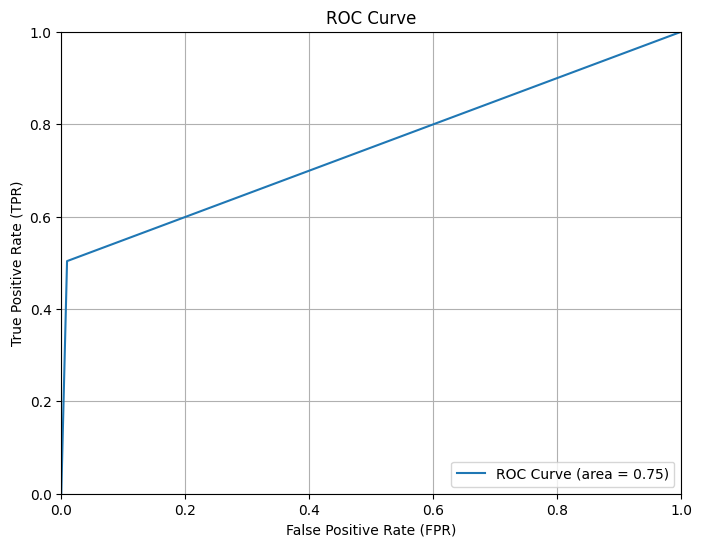

In [92]:
#show metrics
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix


def viewMetric(clf):
    y_preds = clf.predict(X_test)
    auc = roc_auc_score(y_test, y_preds)
    
    print(classification_report(y_test, y_preds))
    print(roc_auc_score(y_test, y_preds))

    # Calculate ROC curve (fpr, tpr, thresholds)
    fpr, tpr, thresholds = roc_curve(y_test, y_preds)

    # Calculate AUC score
    
    # sns.heatmap(confusion_matrix(y_preds, y_test), annot=True)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    

viewMetric(clf)



### Take the first columns whose feature importance sum is equal to 5%

### Remove the rest


In [93]:
#sort and remove
feature_importances = pd.DataFrame(clf.feature_importances_).T
feature_importances.columns = clf.feature_names_in_
feature_importances = feature_importances.T.sort_values(by=0)

feature_importances.iloc[0:20,:].sum()


0    0.053586
dtype: float64

In [94]:
# remove columns
X_train = X_train.drop(['country_zimbabwe', 'currency_USD', 'location_Kariba',
       'location_Zvishavane', 'location_Nyanga', 'location_Kadoma',
       'location_Hwange', 'location_Chimanimani', 'location_Beitbridge',
       'location_Chivhu', 'location_Marondera', 'location_Gweru',
       'marital_status_ ', 'location_Bulawayo', 'location_Harare', 'is_employed',
       'location_Mutare', 'location_Masvingo', 'location_Rusape'], axis = 1)
X_test = X_test.drop(['country_zimbabwe', 'currency_USD', 'location_Kariba',
       'location_Zvishavane', 'location_Nyanga', 'location_Kadoma',
       'location_Hwange', 'location_Chimanimani', 'location_Beitbridge',
       'location_Chivhu', 'location_Marondera', 'location_Gweru',
       'marital_status_ ', 'location_Bulawayo', 'location_Harare',
       'location_Mutare', 'location_Masvingo', 'location_Rusape', 'is_employed'], axis = 1)


We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 5 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Xgboost
5. Multi-layer-perceptron


In [95]:
# #train on different models

# from sklearn.neighbors import KNeighborsClassifier
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_classification
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score


# xgboost = xgb.XGBClassifier()
# logistic = LogisticRegression(max_iter=1000)
# clf = RandomForestClassifier()
# KNN = KNeighborsClassifier()
# roc_auc_dict = {}
# threshold = 0.2
# scaler =StandardScaler()


# def model_train(X_train,y_train, scaler = scaler):
#   #model dictionary
#   models = [
#       {"name": 'RF', "estimator": clf },
#             {"name":"logistic" , "estimator": logistic },
#             {"name":"KNN" , "estimator": KNN },
#               {"name":"xgboost" , "estimator": xgboost }
#             ]

  
 
#   for model in models: 
      
#       model['estimator'].fit((X_train), y_train)
#       y_prob = model['estimator'].predict_proba((X_test))[:, 1]
#       preds = (y_prob > threshold).astype(int)
#       # print(roc_auc_score(y_test, preds))
#       preds
      
#       roc_auc_dict[model['name']] = roc_auc_score(y_test, preds)
  


  



#   # Build the neural network model for binary classification
#   model = Sequential([
#       Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer
#       Dense(32, activation='relu'),  # Second hidden layer
#       Dense(1, activation='sigmoid')  # Output layer for binary classification
#   ])

#   # Compile the model
#   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#   # Train the model
#   history = model.fit(scaler.fit_transform(X_train), y_train, epochs=5, batch_size=8, validation_split=0.2)


#   # Make predictions
#   y_pred_prob = model.predict(X_test)

#   # Convert probabilities to binary predictions
#   y_pred = (y_pred_prob > 0.2).astype(int)
#   roc_auc_dict['nueral network mlp'] = roc_auc_score(y_test,y_pred)
#   print(roc_auc_dict)


#   return pd.DataFrame(roc_auc_dict, index = ['roc_auc_score']).T.plot.bar()

# model_train(X_train, y_train,scaler= scaler)






## ROC_AUC SCORES WITH CROSS VALIDATION


(54672, 30) (54672,)


{'accuracy_score': [0.9040094279774336], 'recall_score': [0.6715068493150684], 'precision_score': [0.6323468104498572], 'f1_score': [0.6513271404925259], 'roc_auc_score': [0.8056723762890792]}


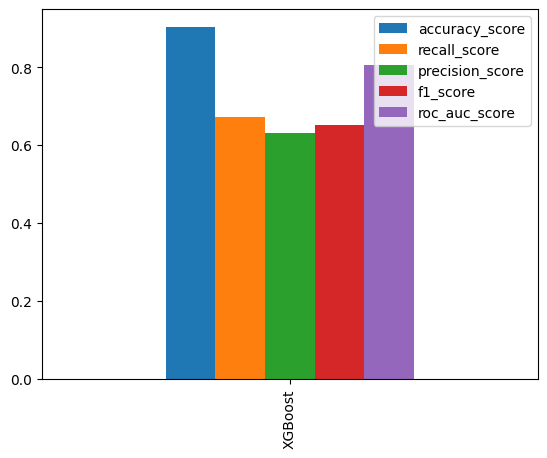

In [97]:
import numpy as np
import pandas as pd
# from sklearn.base import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, make_scorer
# import xgboost as xgb
import statistics
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# cross val score with threshold function 
def cross_val_with_threshold(estimator, X ,y, metric,threshold, cv=5, ):

        skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
        auc_scores = []
        

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            estimator.fit(X_train, y_train)
            probas = estimator.predict_proba(X_test)[:, 1]
            # probas = np.where(X_test['low_risk'] == 1, probas + 0.03, probas)

            np.where

            preds = (probas >= threshold).astype(int)
            auc_scores.append(metric(y_test, preds))
         
        


    
        return statistics.mean(auc_scores)

models = [
    # {"name": 'Random Forest', "estimator": RandomForestClassifier(n_estimators=100, random_state=42)},
    # {"name": "Logistic Regression", "estimator": LogisticRegression(max_iter=1000, random_state=42)},
    # {"name": "KNN", "estimator": KNeighborsClassifier()},
    {"name": "XGBoost", "estimator": xgb.XGBClassifier()},
    # {"name": "lda", "estimator": LinearDiscriminantAnalysis()}
]

def cross_val_scores(threshold, X,y):
    
    
    
    scores_dict = {}
    for metric in [accuracy_score, recall_score, precision_score, f1_score, roc_auc_score]:
        metric_values = []
        for model in models:
         
        
            metric_score = cross_val_with_threshold(model['estimator'], X, y,metric, cv= 5, threshold=threshold, )
            metric_values.append(metric_score)
        metric_name = metric.__name__
        scores_dict[metric_name] = metric_values
    return scores_dict   
        

# Define models
print(X_train.shape, y_train.shape)

score_dict = cross_val_scores( X=X_train, y=y_train,threshold=0.2, )
print(score_dict)
pd.DataFrame(score_dict, index=[model['name'] for model in models]).plot.bar()
plt.show()


## Chosen Model: XGBoost
#### Explanation
* Our data has very informative outliers so  its unwise to remove or transform them. 
   The best is to  leave them
* It is generally giving the best mark among all tried models

#### Assumptions: 
* Assumes that features are informative and not highly correlated to avoid overfitting.
#### Limitations:
* Can be sensitive to noisy data and requires careful tuning of hyperparameters.

# FEATURE ENGINEERING


In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

#take the kmeans component as a column
kM = KMeans(n_clusters=2)
kmeans = kM.fit(X_train, y_train)
kmeans = kM.transform(X_train)
kmeans1 = kM.transform(X_test)
pca = PCA(n_components=1).fit_transform(X_test[['interest_rate', 'age']])


#age and interset rate on the plot seperates classes, create a new feature from them

X_train['rate_age_ratio'] = (X_train['interest_rate'] * X_train['age'])**4
X_test['rate_age_ratio'] = (X_test['interest_rate'] * X_test['age'])**4

X_train['K1'] = kmeans.T[0]
X_train['predicted_low_default'] = np.where((X_train['age'] < 40) & (X_train['interest_rate'] < 0.17), 1, 0)


X_test['K1'] = kmeans1.T[0]
X_test['predicted_low_default'] = np.where((X_test['age'] < 40) & (X_test['interest_rate'] < 0.17), 1, 0)

#add new feature. date to income ratio
X['debt_to_income'] = df['outstanding_balance']/df['salary']




## DATA SAMPLING TO BALANCE CLASSES


In [100]:

# USING SMOTE TO RESAMPLE TO OUR DATA 

# from imblearn.over_sampling import ADASYN
# sm = ADASYN(sampling_strategy=0.3,random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X_train,y_train)
# y_resampled.value_counts()

from imblearn.under_sampling import RandomUnderSampler
# # y = y.map({'Did not default': 0, 'Defaulted': 1}).astype('int')
# # Load your data (X: features, y: target labels)


# Define the under-sampler
rus = RandomUnderSampler(sampling_strategy='majority')  # Undersample majority class

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_resampled







,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,remaining term,salary,marital_status_married,marital_status_single,gender_female,...,location_Gokwe,location_Karoi,location_Kwekwe,location_Plumtree,location_Redcliff,location_Shurugwi,location_Victoria Falls,rate_age_ratio,K1,predicted_low_default
39473,46000.0,0,35691.000910,0.23,51,39,2299.579732,False,True,False,...,False,False,False,False,False,False,False,18931.806130,8333.644350,0
37825,47000.0,0,51142.959629,0.21,46,68,3788.630553,True,False,True,...,False,False,False,False,False,False,False,8707.801203,9674.332400,0
15102,39000.0,0,44310.434103,0.23,47,36,2107.394271,True,False,False,...,False,False,False,False,False,False,False,13655.348107,3370.757070,0
12811,33000.0,0,35456.450905,0.24,50,35,2041.178628,True,False,False,...,False,False,False,False,False,False,False,20736.000000,11695.483965,0
64561,45000.0,0,33516.266748,0.20,45,48,2736.410617,True,False,True,...,False,False,False,False,False,False,False,6561.000000,9905.978409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82905,56000.0,0,35418.032323,0.23,44,68,4233.692231,True,False,False,...,False,False,False,False,False,True,False,10488.709327,15989.110927,0
62386,58000.0,0,59603.618647,0.19,46,44,2708.556689,True,False,True,...,False,False,False,False,False,False,False,5835.065434,23149.367511,0
3993,34000.0,0,51911.082183,0.20,43,42,2377.074929,True,False,False,...,False,False,False,True,False,False,False,5470.081600,12001.876900,0
40603,4000.0,0,25241.682771,0.18,40,35,1863.561392,True,False,False,...,False,False,False,True,False,False,False,2687.385600,41878.331777,0


### DETERMINE THE OPTIMUM THRESHOLD FOR ROC_AUC SCORE PROBABILITY


{'accuracy_score': [0.8342846019041463], 'recall_score': [0.7632876712328767], 'precision_score': [0.4318761002100989], 'f1_score': [0.5516099192962968], 'roc_auc_score': [0.8042564117378382]}


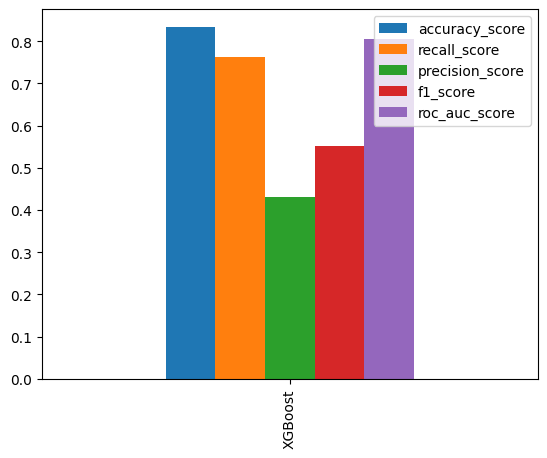

In [101]:
# thresholds = np.arange(0,1,0.1)
# def searchThreshold(thresholds):

    
    
#     for i in thresholds:

#                 roc_auc_dict = cross_val_scores( X=X_resampled, y= y_resampled ,threshold =i )
            
#                 print(f"threshold : {i}, score : {roc_auc_dict['XGBoost']}")
    
# searchThreshold(thresholds)

score_dict = cross_val_scores( X=X_train, y=y_train,threshold=0.1, )
print(score_dict)
pd.DataFrame(score_dict, index=[model['name'] for model in models]).plot.bar()
plt.show()

<Axes: xlabel='loan_amount', ylabel='outstanding_balance'>

<Figure size 1000x600 with 0 Axes>

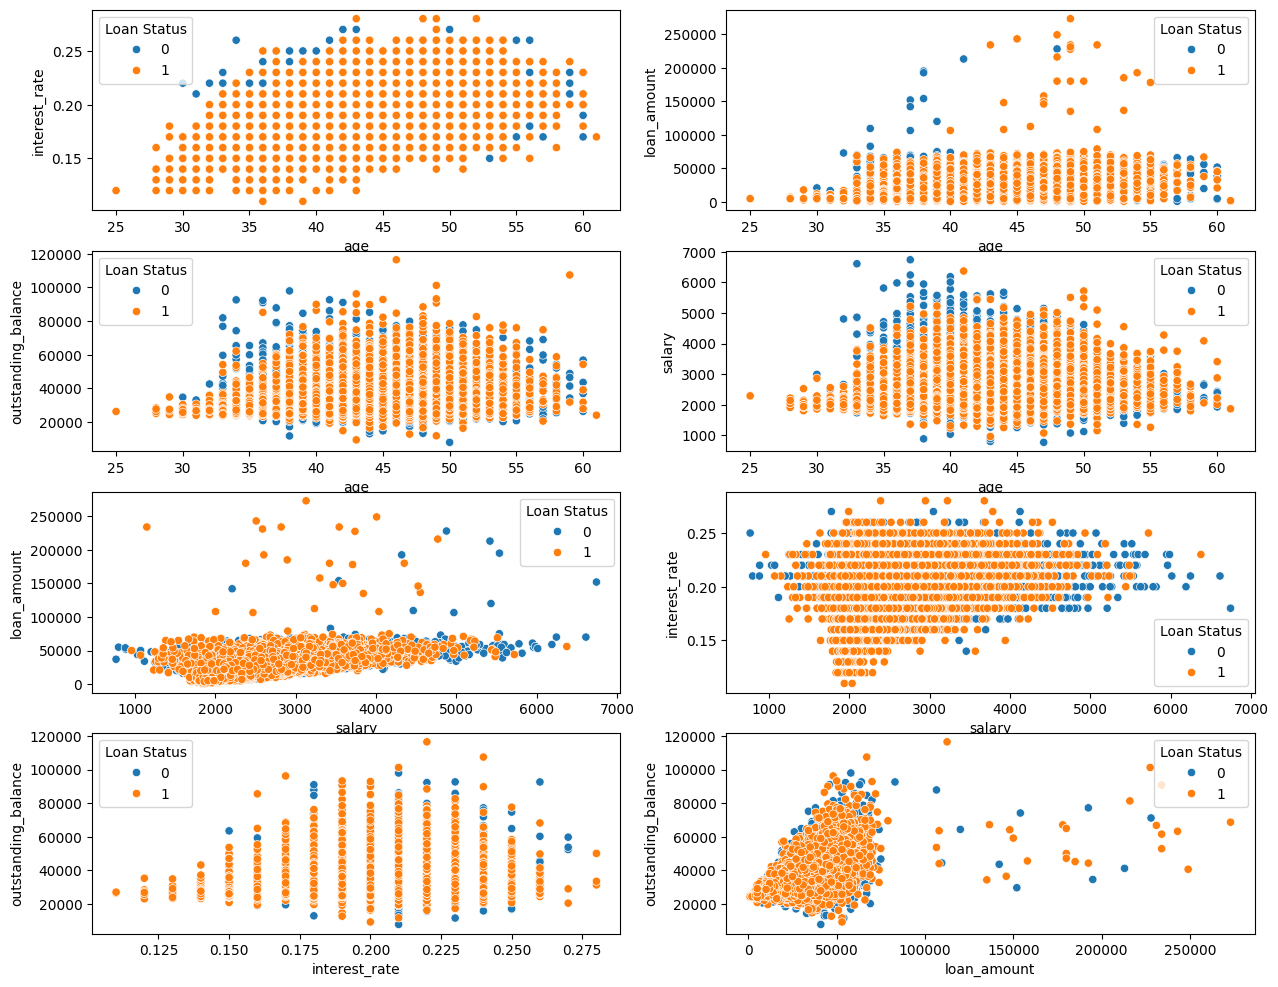

In [ ]:

plt.figure(figsize=(10, 6))
fig, ((ax, ax1), (ax2,ax3), (ax4, ax5),(ax6, ax7)) = plt.subplots(nrows=4, ncols=2, figsize = (15,12))
sns.scatterplot(data=X_resampled, x='age', y= 'interest_rate', hue= y_resampled, ax= ax)
sns.scatterplot(data=X_resampled, x='age', y= 'loan_amount', hue= y_resampled, ax= ax1)
sns.scatterplot(data=X_resampled, x='age', y= 'outstanding_balance', hue= y_resampled, ax= ax2)
sns.scatterplot(data=X_resampled, x='age', y= 'salary', hue= y_resampled, ax= ax3)
sns.scatterplot(data=X_resampled, x='salary', y= 'loan_amount', hue= y_resampled, ax= ax4)
sns.scatterplot(data=X_resampled, x='salary', y= 'interest_rate', hue= y_resampled, ax= ax5)
sns.scatterplot(data=X_resampled, x='interest_rate', y= 'outstanding_balance', hue= y_resampled, ax= ax6)
sns.scatterplot(data=X_resampled, x='loan_amount', y= 'outstanding_balance', hue= y_resampled, ax= ax7)
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

In [ ]:
# xgboost = xgb.XGBClassifier(
#                             max_depth = 8, 
#                             learning_rate = 0.20,
#                             n_estimators = 100,
                           
#                             )
# xgboost.fit(X_resampled, y_resampled)
# probas = xgboost.predict_proba(X_test)[:, 1]

# preds = (probas >= 0.2).astype(int)
# auc_score = roc_auc_score(y_test, preds)

# auc_score

X_test.columns, X_resampled.columns


(Index(['loan_amount', 'number_of_defaults', 'outstanding_balance',
        'interest_rate', 'age', 'remaining term', 'salary', 'low_risk',
        'marital_status_married', 'marital_status_single', 'gender_female',
        'gender_male', 'gender_other', 'job_Accountant', 'job_Data Analyst',
        'job_Data Scientist', 'job_Doctor', 'job_Engineer', 'job_Lawyer',
        'job_Nurse', 'job_Software Developer', 'job_Teacher',
        'location_Chipinge', 'location_Chiredzi', 'location_Gokwe',
        'location_Karoi', 'location_Kwekwe', 'location_Plumtree',
        'location_Redcliff', 'location_Shurugwi', 'location_Victoria Falls',
        'rate_age_ratio', 'K1', 'predicted_low_default'],
       dtype='object'),
 Index(['loan_amount', 'number_of_defaults', 'outstanding_balance',
        'interest_rate', 'age', 'remaining term', 'salary', 'low_risk',
        'marital_status_married', 'marital_status_single', 'gender_female',
        'gender_male', 'gender_other', 'job_Accountant', 'job_